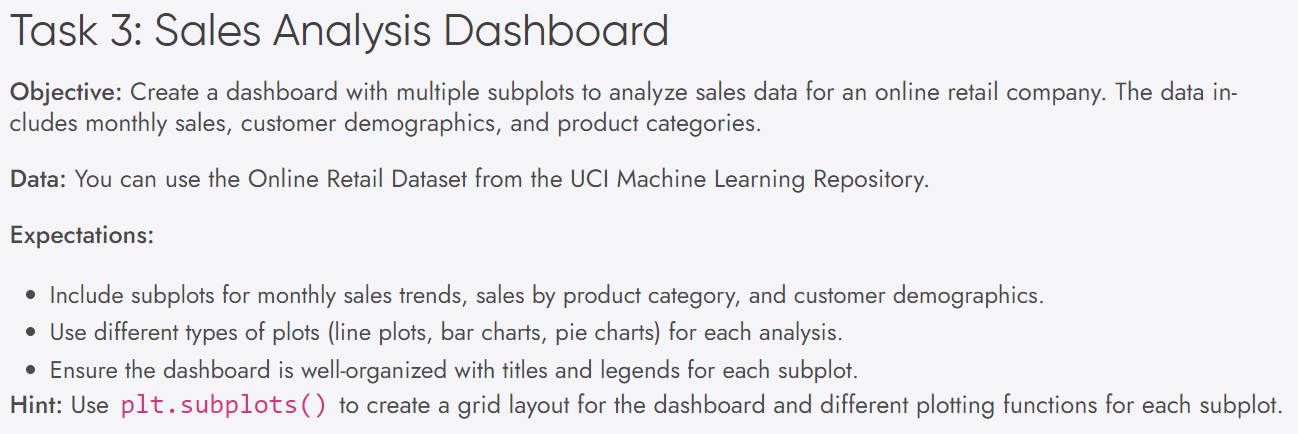

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Data Preprocessing
data.dropna(subset=['CustomerID'], inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.to_period('M')

In [ ]:
# Convert 'Quantity' to numeric, forcing errors to NaN, then drop NaNs
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data.dropna(subset=['Quantity'], inplace=True)

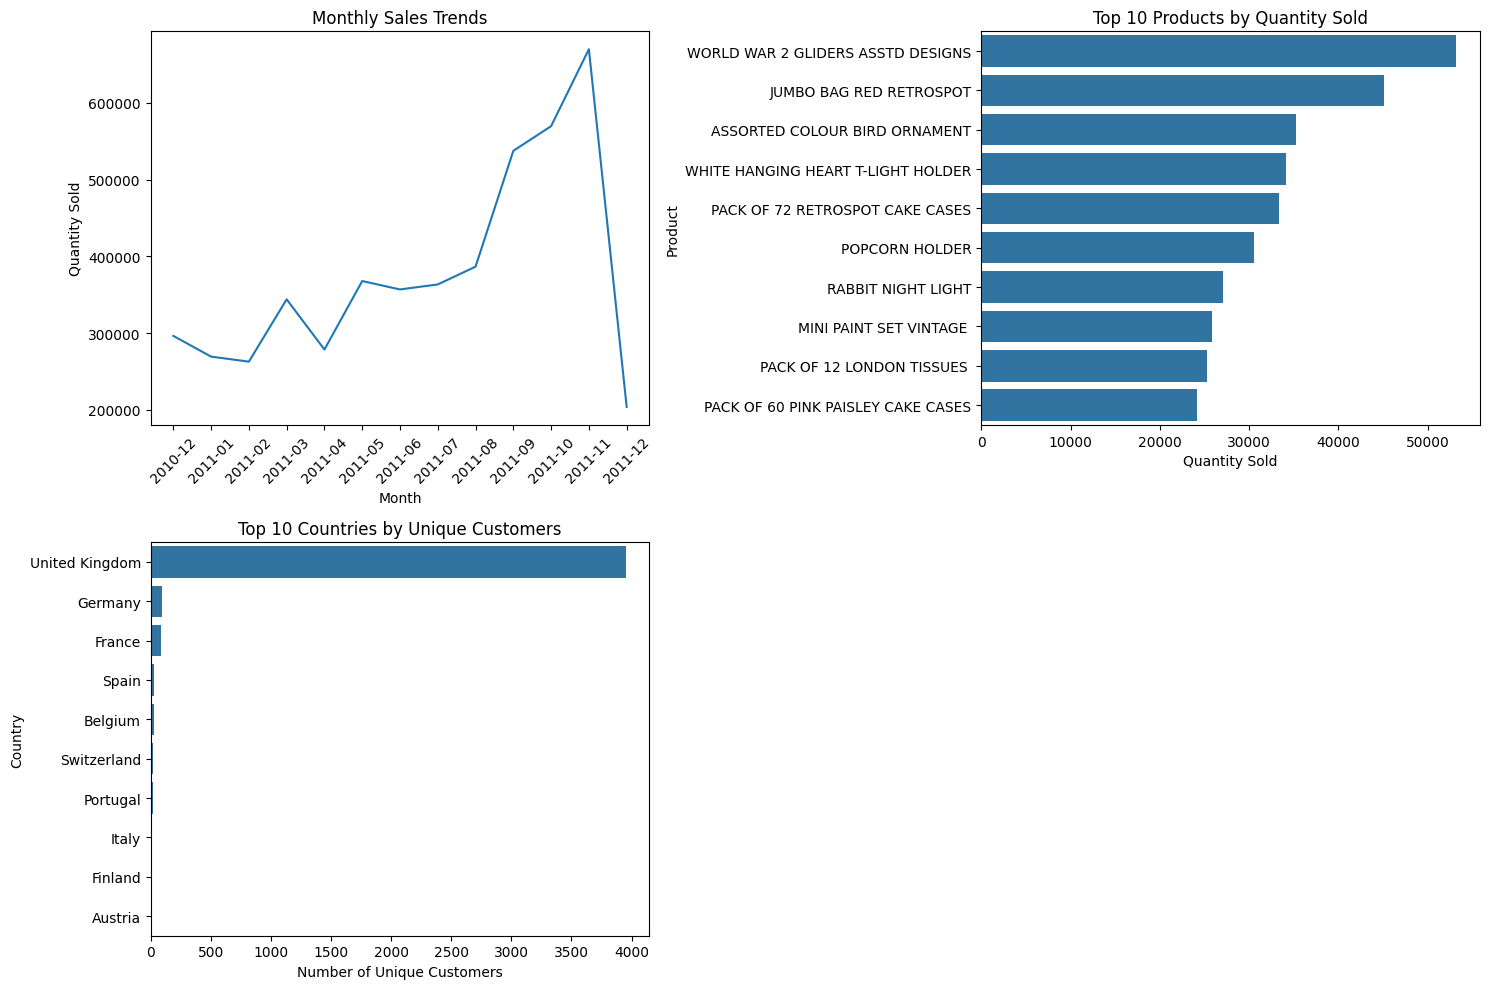

In [ ]:
# Data Preprocessing
data.dropna(subset=['CustomerID'], inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.to_period('M')
# Convert 'Quantity' to numeric, forcing errors to NaN, then drop NaNs
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data.dropna(subset=['Quantity'], inplace=True)
# Monthly Sales Trends
monthly_sales = data.groupby('Month')['Quantity'].sum().reset_index()
# Sales by Product Category (Top 10)
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
# Customer Demographics
customer_demographics = data.groupby('Country')['CustomerID'].nunique().reset_index()
# Create the dashboard
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Set the background color to white
fig.patch.set_facecolor('white')

# Monthly Sales Trends Plot
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert Month to string for plotting
sns.lineplot(x='Month', y='Quantity', data=monthly_sales, ax=axs[0, 0])
axs[0, 0].set_title('Monthly Sales Trends')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Quantity Sold')
axs[0, 0].tick_params(axis='x', rotation=45)

# Sales by Product Category Plot
sns.barplot(x='Quantity', y='Description', data=top_products, ax=axs[0, 1])
axs[0,1].set_title('Top 10 Products by Quantity Sold')
axs[0,1].set_xlabel('Quantity Sold')
axs[0,1].set_ylabel('Product')

# Customer Demographics Plot
sns.barplot(x='CustomerID',y='Country', data=customer_demographics.sort_values(by='CustomerID', ascending=False).head(10), ax=axs[1, 0])
axs[1, 0].set_title('Top 10 Countries by Unique Customers')
axs[1, 0].set_xlabel('Number of Unique Customers')
axs[1, 0].set_ylabel('Country')
axs[1, 0].tick_params(axis='x', rotation=45)

# Hiding the fourth subplot
axs[1, 1].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()